# GANs GANs and more GANs!

So far we have covered GANs at their most basic level but it is important to know that the original GAN was formulated in 2014. GANs have evolved tremendously since their inception. Many researchers have explored GANs and this has resulted in many different architectures being created as a result of this exploration. In this notebook, I'll be going over some of the notable variations of the original GAN architecture and how they've improved upon the original!

## The Deep Convolutional GAN (DCGAN)

The [DC GAN](https://arxiv.org/pdf/1511.06434.pdf) was the first major edit of the traditional GAN architecture and is regarded as one of the most influential papers regarding GANs. Released in 2015, this formulation of the GAN offered to combine the sucess of Convolutional Neural Networks at the time with GANs. The authors of this paper used strided convolutions to improve performance, replacing the MLP architecture proposed by Goodfellow. This led to significant improvement in performance and generation fidelity along with training stability. The authors of this paper were also very influential in fine tuning and defining an architecture that would serve to be the basis for many future papers. The guidelines proposed by the original authors are as follows:

>Architecture guidelines for stable Deep Convolutional GANs
>- Replace any pooling layers with strided convolutions (discriminator) and fractional-strided convolutions (generator).
>- Use batchnorm in both the generator and the discriminator.
>- Remove fully connected hidden layers for deeper architectures.
>- Use ReLU activation in generator for all layers except for the output, which uses Tanh.
>- Use LeakyReLU activation in the discriminator for all layers.

## The Conditional Generative Models

### The CGAN (2014)

One weakness of traditional unconditional GANs is that you have no control over what the GAN generates and its mode. What if we were able to control what the GAN generated? That's where [CGANs](https://arxiv.org/pdf/1411.1784.pdf) come to the rescue! CGAN's modify the traditional GAN architecture by feeding class labels along with the generated image to the discriminator and feeding class labels along with noise to the generator. This allows the GAN to become *"conditioned"* and will cause the generator to learn to associate a class label with a particular mode output. Essentially, the addition of a class adds more structure to the GANs latent space and the labels act as a "guide" that tells the GAN what its output should be. So once a CGAN is fully trained it is able to generate different modes based on a passed in label and noise. 

| <img src="images/cgan.png" width="500"/> |
|:--:|
| <b>Fig 1. CGAN architecture [1]</b>|

This subset of GANS is one of the most important areas currently being investigated. The power to control just exactly what you generate along with the high-fidelity images that GANS produce makes Conditional GANS very useful. This focus has led to a massive development in different CGAN architectures that allow you to have control over what ends up generated. Some other notable C

### AC-GAN (2016)

While the CGAN was first to give power to the user to generate images of their choice, the images generated were typically of very poor quality and diversity as there were natural limitations of the CGANs performance based on the formulation and architecture. In fact, CGAN struggled greatly when it came to generate high quality samples from datasets with high variability. The authors of the [ACGAN](https://arxiv.org/pdf/1610.09585v4.pdf) architecture modified the architecture of the CGAN to even further improve the generation quality of images. 

At the time of the formulation of the original AC-GAN paper, there was work exploring the benefits and viability of modifying the discriminator to reconstruct side information. In fact, there was an emphasis at the time to see if tasking the discriminator with predicting other features about the image also improved accuracy. To check this, researchers introduced auxiliary decoder network to the discriminator that output the class label of an image or the latent varaibles from which the samples were generated from. They found that by introducing the auxilaiary decoder this resulted in a significant improvement in generation performance. Plus, by implementing an **auxiliary decover**, it becomes possible to use pretrained classifier in the process. This inspired the authors of the AC-GAN to combine auxiliary decoder with the architecutre of the CGAN. 

This changed the formulation of the CGAN to the following: $L_{s}$ represents the log-likelihood of the data coming from the real images while $L_{c}$ represents the log-likehood of the data coming from the correct class.

> $L_{s}=E[logP(S=real | X_{real}]+ E[logP(S=fake|X_{fake})]$

> $L_{c}=E[logP(C=c | X_{real})]+ E[logP(C=c|X_{fake})]$

The discriminator tries to maximize the likelihood that the data comes from the correct source and from the correct class leading to $L_{s}+L_{c}$ while the generator directly competes with the GAN and tries to maximize $L_{c}-L_{s}$.

This change doesn't look too much different from what was explored in the original GAN formulation but by introducing the auxiliary decoder, this has a tremendous effect on stabalizing GAN training and improving performance [2]. 

| <img src="images/GAN-comparison.png" width="800"/> |
|:--:|
| <b>Fig 2. GAN, conditional GAN (CGAN) and auxiliary classiﬁer GAN (ACGAN) architectures, where x denotes the real image, c the class label, z the noisevector, G the Generator, and D the Discriminator. [3]</b>|

Another innovative discovery made by the authors of AC-GAN at the time was that increasing the resolution of images generated by the generator vastly improves the performance of the model and improves discriminability. This coincidentally enough would lead to the next major Conditional GAN formulation.

### The BigGAN (2018)

So while AC-GAN and its successor were able to improve the CGANs performance in generation quality, the AC-GAN and CGAN still suffered from poor performance when it comes to generating classes with a lot of variety and high fidelity. The authors of [BigGAN](https://arxiv.org/pdf/1809.11096v2.pdf) made 3 majors contribution to the field when they determined...

- GANs benefit greatly when they are scaled up. BigGAN introduced models with 2 to 4 times the original parameters, and a batch size of 8 times the original. Altering the architecture of the GAN and introducing a regularization scheme can result in very positive results...

- By modifying the architecture of GANs using the approach the authors did, this allowed them to introduce the **"truncation trick"** which refers to the use of sampling from a truncated normal distribution. This allows the user to have control during the training process of whether or not a GAN should prioritize sample variety or sample quality.

- There exist methods (skip-z, shared embeddings, Orthogonal Regularization) that can be implemented to reduce the instabilities and time it takes of training such a large GAN model. 

To find out more details about the exact modifications that the authors implemented to obtain SOTA performance, I'd reccommend you directly check out the paper. They succinctly go over the modifications that they implemented to scale up the GAN architecture and can probably explain it in better terms then I can. 

| <img src="images/biggan.png" width="800"/> |
|:--:|

## The Unconditional Generative Models

It should also be noted that there is merit in generating the best image that you can unconditionally

### Wasserstein GAN

The first major break through in the GAN architecture came with the introduction of the [Wasserstein GAN](https://arxiv.org/pdf/1701.07875.pdf). The authors of the Wasserstein GAN sought to solve many of the major problems associated with GANs such as stability by modifying the loss function of the GAN itself. In fact, this shift is so drastic that it changes the traditional structure of a GAN discriminator from the classic 'detectice' that determines real or fake to a 'critic' that scores the generator based on how well the generated art resembles real art. This minor change, greatly modifies the behavior of the GAN and helps to promote image quality as an objective of the GAN.

First to understand the changes the authors made it is important to note the weakness of the original GAN architecture. One fundamental flaw can be seen in the use of a detective that only discerns real or fake samples. The discriminator learns to discern the difference between real or fake images very quicky and it no longer provides a reliable gradient upon which the model can continuously improve one. This is a massive issue so the authors of the paper sought to change the role of the discriminator to one that focuses on scoring a sample based on its 'realness'. To make this change viable, the authors of the paper used earth mover distance (Wasserstein distance) to train the GAN and measure the distance between the data distribution from the training set and the distribution from the generator. This guides the performance of the generator and the optimization of this loss provides theoretical guarantees of smoothness that makes it easy to find an optimal point as the use of this metric results in a linear function that is easy to differentiate on and ensures that loss cannot saturate. So by using earth mover distance, this results in a GAN that is more robust and insensitive to paramters and archiecture as the use of this loss makes the GAN less fickle.

$$W(\mathbb{P}_{r}, \mathbb{P}_{g}) = inf_{\gamma \in \Pi (\mathbb{P}_{r}, \mathbb{P}_{g})} \mathbb{E}_{(x,y)\tilde \ \gamma}[|x-y|]$$

The authors of the paper created the following guidelines that they thought would be useful for the training for WGANs

>- Use a linear activation function in the output layer of the critic function
>- Use Wasserstein loss to train the critic and generator
>- Limit the critic models weights to [-0.01,0.01] after each mini batch udpate
>- Update the critic model more times than the generator each iteration
>- Use RMSprop ats momentum based optimizers such as ADAM introduced instability

## Style Transfer Generative Models

Another approach that GAN makers had that they thought would be useful, was the transfering of chracteristics from one iamage domain to another and to figure out how these characteristics could be translated into another image image all without paired examples. This is called the image-to-image translation problem and is a hotly explored issue in GAN space and ML.

### Cyclegan

[Cyclegan](https://arxiv.org/abs/1703.10593) takes the traditional GAN approach and modifies it so that it consist of two generator and two discriminators. One generator takes images from the source and tries to translate it to the destination while the other generator tries to reverse this process. The discriminator are modified to be more similar to wasserstein in the sense that they are used to rate the quality of fake or real images and to update the two generators respectively. While this seems like a valid solution, it is important to know that there is no guarantee that the function will the first set of features to the second set properly. So the authors implement something called cycle consistency that says when translating a something forwards, you should be able to translate it back to its original form. The author's implement a loss that guarantees cycle consistency and judges the GAN based on how similar the before and after image is. 

| 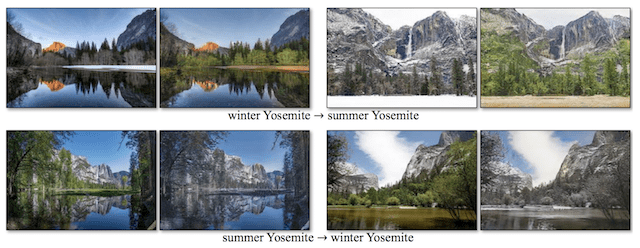 |
|:--:|
| [5] |

### Stylegan

[Stylegan](https://arxiv.org/abs/1812.04948) seeked to give enhanced control to the generation process and create a system in which we had high control over what we would generate. To accomplish this, StyleGAN uses a progressive growing GAN that focuses on generating very high-quality images from the slow expansion of the discriminator and generator from small to large during training which helps it learn to generate high-quality images better. The generator is also heavily modified in this implementaiton in which the inputs are a standalone mapping network and some noise layers. 

>The output from the mapping network is a vector that defines the styles that is integrated at each point in the generator model via a new layer called adaptive instance normalization. The use of this style vector gives control over the style of the generated image.
Stochastic variation is introduced through noise added at each point in the generator model. The noise is added to entire feature maps that allow the model to interpret the style in a fine-grained, per-pixel manner. [5]

The use of multiple blocks in the network allows each block to focus on developing a certain feature given the mapping network and the noise.

There are a lot of changes not listed but in summary the changes implemented via StyleGan include:

- Baseline Progressive GAN. -> Progressively increasing the generators complexity until the desired output size is reached
- Addition of tuning and bilinear upsampling. -> The use of bilinear upsampling to increase the size of each image. 
- Addition of mapping network and AdaIN (styles). -> A standalone mapping network takes random noise and generates a style vector. This style vector is then incorporated into each block of the generator model after the convolutional layers via adaptive isntance normalization (AdaIN). AdaIN standardizes the output into a normal Gaussian and then adds the style vector as a bias. This transforms the generator into a synthesis network
- Removal of latent vector input to generator.
- Addition of noise to each block. -> Noise is added at each conv layer to create some variation in the details of features.
- Addition Mixing regularization. -> The use of two styles vectors during training. This combats overfitting and allows the network to better localize styles and enhance details

| 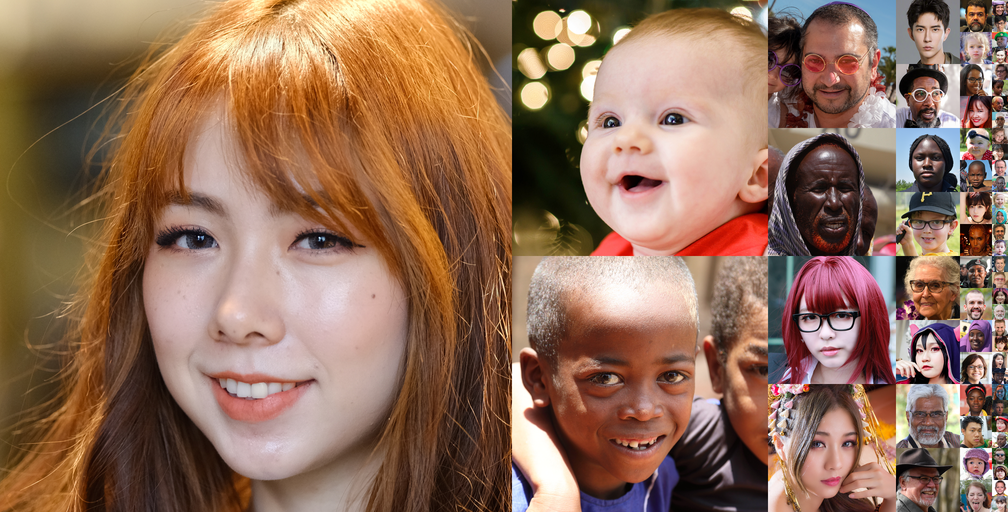 |
|:--:|
| StyleGAN was originally formulated to generate images of faces as seen here [6] |

## SOTA Generative Networks

As a conclusion to this notebook, GANs are some of the most exciting technologies to come out as of date. They offer a way to generate very high quality images that were thought to never be possible before. While this notebook was a summary of older methods, it is important to note that research in this field is constantly updating. One of the largest SOTA methods to come out as of late is from OpenAI's DALLE 2. DALLE 2 allows users to enter in text and to receive an image that accurately refelects the inputted text. At the end of the day this is just one of the many SOTA that will come out and try to tackle the process of image generation.

| 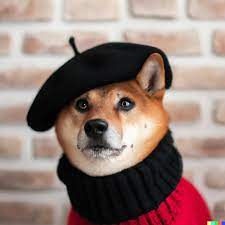 |
|:--:|
| A Shiba Inu with a beret in a sweater. Just one of the images generated by DALLE 2 [7] |

## Summary table

| Architecture | Problem Solved |
|:--:| :--:|
| GAN | Allows generation of images from noise |
| CGAN | Allows control over image generation |
| BigGAN| Allows for higher image fidelity while allowing control over image generation |
| WGAN | Allows for smoother training process of GANs |
| CycleGan | Allows for image-to-image problem to be tackled and allows network to transfer styles from one domain to another |
| StyleGAN | Allows for near photo-realistic generation of images |

[1] https://arxiv.org/pdf/1411.1784.pdf

[2] https://arxiv.org/pdf/1610.09585v4.pdf

[3] https://www.researchgate.net/publication/328494719_LoGAN_Generating_Logos_with_a_Generative_Adversarial_Neural_Network_Conditioned_on_color

[4] https://arxiv.org/pdf/1809.11096v2.pdf

[5] https://machinelearningmastery.com/what-is-cyclegan/

[6] https://machinelearningmastery.com/introduction-to-style-generative-adversarial-network-stylegan/

[7] https://www.theverge.com/2022/4/6/23012123/openai-clip-dalle-2-ai-text-to-image-generator-testing

In [ ]:
# Summary table of how GANS were solved
# Cyclegan, styletransfergan, 
# SOTA models: DALLE2, REACGAN, etc.